In [5]:
#data cleaning with imputation for missing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
df = pd.read_csv("Drinking_water.csv")

In [34]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [38]:
len(df.columns)

10

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


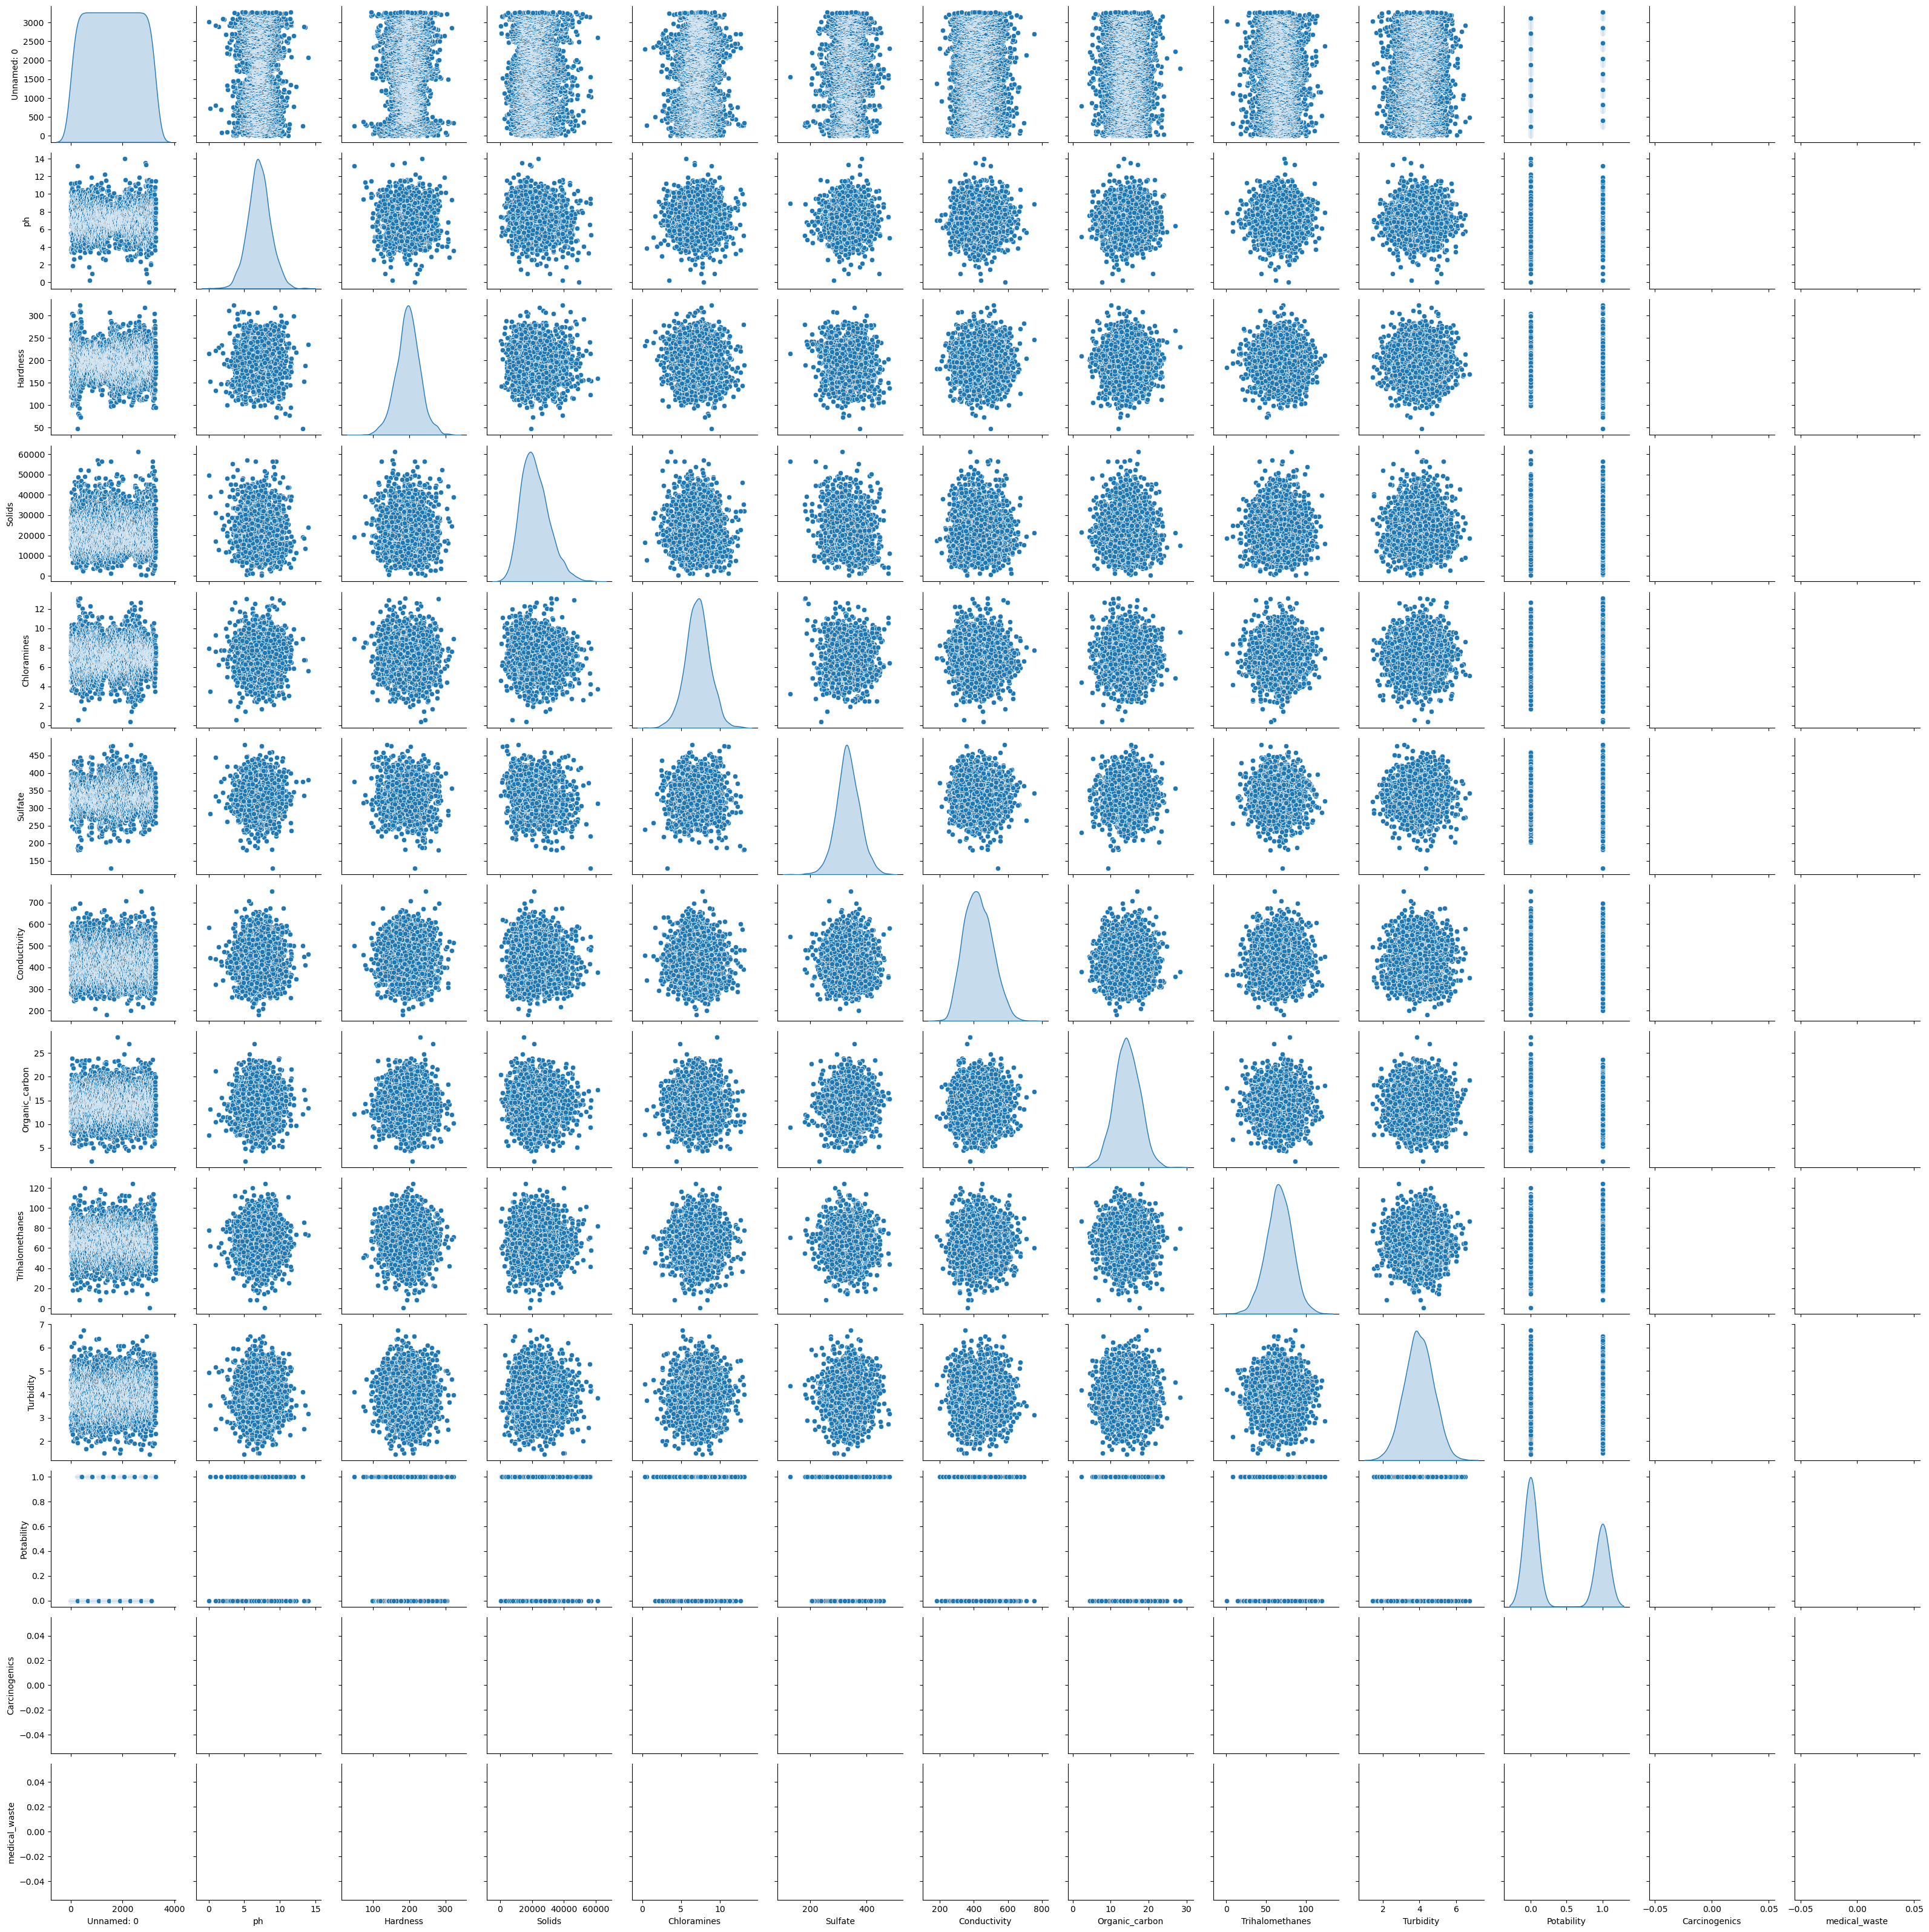

In [31]:
# Relationships between features
sns.pairplot(data=df,diag_kind='kde')

In [32]:
#remove columns with 0 data
dropcolumns=['Carcinogenics','medical_waste','Unnamed: 0']
df = df.drop(dropcolumns,axis=1)

In [ ]:
df.isnull().sum()

In [200]:
#get %
100* df.isnull().sum() / len(df)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [157]:
removepotability=df.pop('Potability')

In [42]:
scaler = MinMaxScaler()

In [44]:
# Normalize the DataFrame
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [48]:
#df['Potability'] = removepotability.values

In [52]:
df_norm.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,NaN,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,NaN,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


In [54]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [56]:
percent_nan = percent_missing(df)

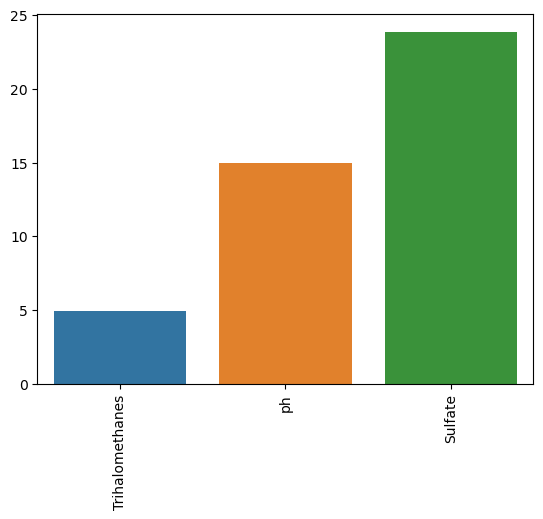

In [58]:
#visualize
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [60]:
df['Trihalomethanes'].mean()

66.39629294676803

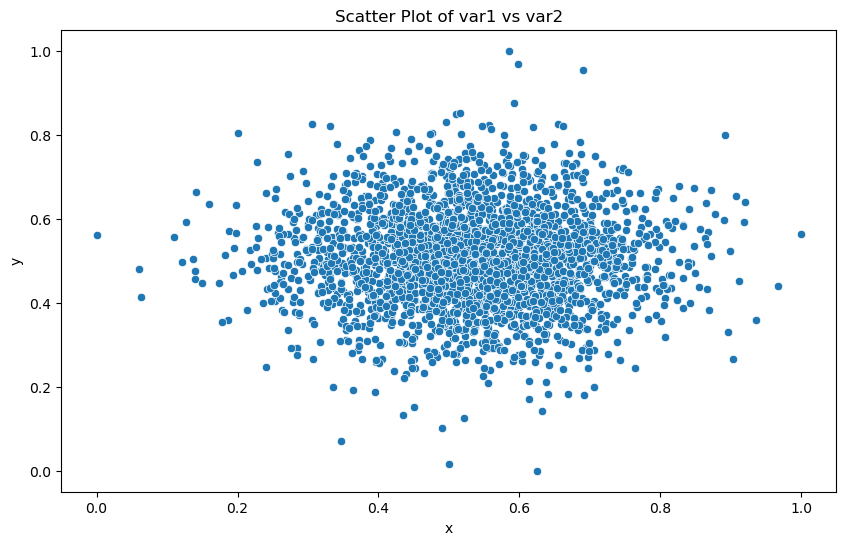

In [214]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trihalomethanes', y='ph', data=df_norm)
plt.title('Scatter Plot of var1 vs var2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [226]:
# Impute missing values with the mean of each column
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


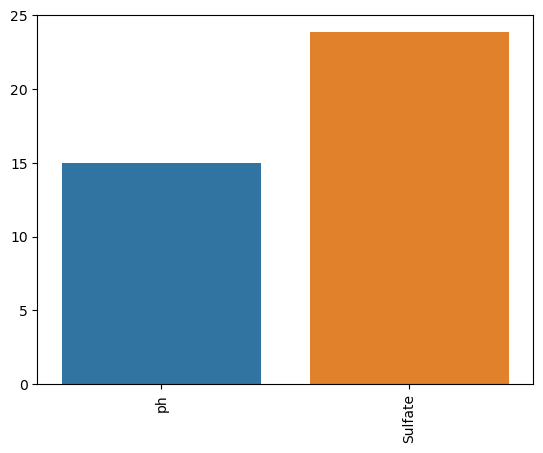

In [230]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [64]:
df_norm.corr()['Potability'].sort_values()

Organic_carbon    -0.030001
Sulfate           -0.023577
Hardness          -0.013837
Conductivity      -0.008128
ph                -0.003556
Turbidity          0.001581
Trihalomethanes    0.007130
Chloramines        0.023779
Solids             0.033743
Potability         1.000000
Name: Potability, dtype: float64